In [1]:
import cv2
import os
from tqdm import tqdm
from IPython.display import clear_output
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [7]:
vidpath = '../stimuli/'
vidname = 'Sherlock S01E01 - A Study In Pink.mp4'
outpath = '../stimuli/vid_frames/'
sizefnamepath = '../data/'
sizefname = 'sherlock_framecomplexity.txt'

### Extract frames from video

In [3]:
vidcap = cv2.VideoCapture(vidpath+vidname)
framecount = vidcap.get(7)

In [5]:
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite(outpath+"frame%d.jpg" % count, image)     # save frame as JPEG file    
    success,image = vidcap.read()
    count += 1
    clear_output(wait=True)
    print(str(int((count+1)*100/framecount)) + '% completed')

nframes = count

100% completed


### Get jpeg size of each frame

In [6]:
sizefile = open(sizefname, 'w')

for filen in tqdm(range(nframes)):
    size = os.stat(outpath + 'frame' + str(filen) + '.jpg').st_size
    sizefile.write(str(filen) + '\t' + str(size) + '\n')

sizefile.close()

100%|██████████| 132150/132150 [00:03<00:00, 38850.19it/s]


In [8]:
sizefile = pd.read_table(sizefnamepath+sizefname, names=['framenum', 'jepgsize'])

In [9]:
sizefile.head()

,framenum,jepgsize
0,0,4307
1,1,4307
2,2,4307
3,3,4307
4,4,4307


/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


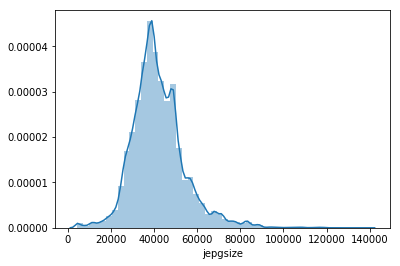

In [10]:
sns.distplot(sizefile['jepgsize'])

### Show some examples

In [11]:
sample = sizefile.sample(10).sort_values(by=['jepgsize'])

In [12]:
sample.head()

,framenum,jepgsize
118423,118423,24792
37593,37593,28422
66514,66514,31534
39837,39837,33248
108480,108480,38988


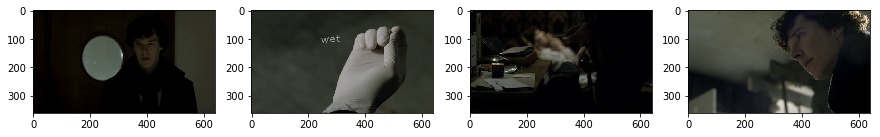

In [14]:
nFigs = 4
f, axarr = plt.subplots(1, nFigs, figsize=(15,15))

for i in range(nFigs):
    img = mpimg.imread((outpath + 'frame' + str(sample.iloc[i]['framenum']) + '.jpg'))
    axarr[i].imshow(img)